# Analyzing the quality of wine

In this project I analyze the quality of red wine based on it's physicochemical properties. The dataset "winequality-red.csv" was downloaded from kaggle.com.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
wine = pd.read_csv('winequality-red.csv')

In [80]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


These are short descriptions of each columns:

 - fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
 - volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
 - citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines 
 - residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
 - chlorides - the amount of salt in the wine
 - free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
 - total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
 - density - the density of water is close to that of water depending on the percent alcohol and sugar content 
 - pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
 - sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

In [81]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We are interested what all these parameters say about the quality of wine.

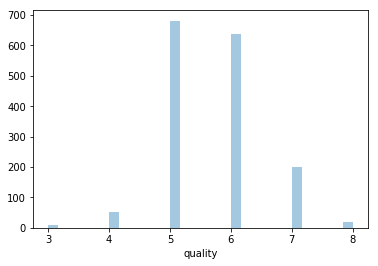

In [84]:
sns.distplot(wine['quality'],kde=False)

As we can see, this dataset is unbalanced with most quaility grades being in the middle.

In [85]:
wine.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

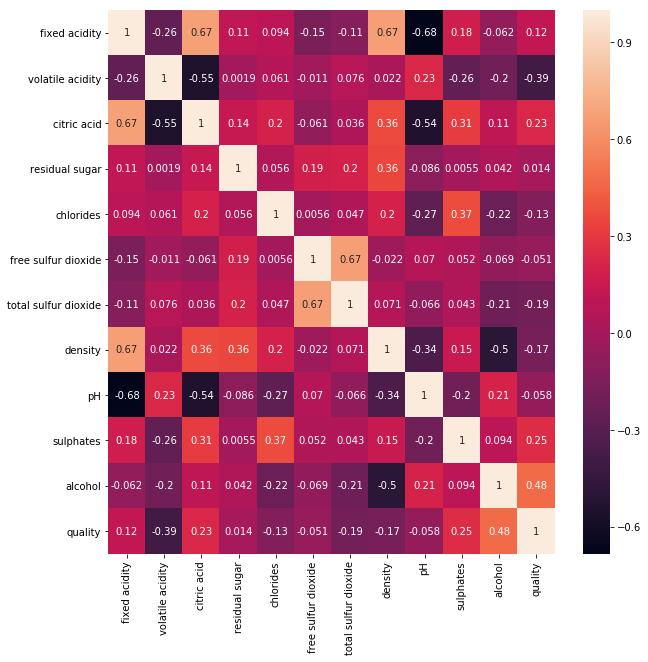

In [86]:
plt.figure(figsize=(10,10))
heatmap =sns.heatmap(wine.corr(),annot=True)

The quality of the wine is most positively correlated with the amount of alcohol in it and most negatively correlated with the amount of volatile acidity.

## Predicting the quality of wine

I would like to use these parameters to classify the wine into two categories: "not good" (0) and "good" (1). The cut-off point is 7. I will create the dummy variables accordingly:

In [87]:
def quality_classification(q):
    if q>=7:
        return 1
    else:
        return 0

In [88]:
wine['quality_binary'] = wine['quality'].apply(quality_classification)

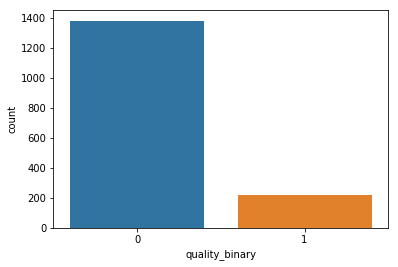

In [89]:
sns.countplot(x='quality_binary', data=wine)

In [90]:
wine.drop('quality',axis=1,inplace=True)

In [91]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In this project I will use four machine learning algorithms for binary classification: logistical regression, decission tree, random forest and support vector machines.

In [92]:
X = wine.drop('quality_binary',axis=1)
y = wine['quality_binary']

### 1. Logistical regression

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logmodel = LogisticRegression()

In [97]:
logmodel.fit(X_train, y_train)

C:\Users\Boba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
lin_predictions = logmodel.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [100]:
print(confusion_matrix(y_test, lin_predictions))

[[443  11]
 [ 54  20]]


In [101]:
print(classification_report(y_test, lin_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       454
           1       0.65      0.27      0.38        74

   micro avg       0.88      0.88      0.88       528
   macro avg       0.77      0.62      0.66       528
weighted avg       0.86      0.88      0.85       528



In [102]:
print(accuracy_score(y_test, lin_predictions))

0.8768939393939394


### 2. Decision tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree = DecisionTreeClassifier()

In [105]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
dtree_predictions = dtree.predict(X_test)

In [107]:
print(confusion_matrix(y_test, dtree_predictions))

[[411  43]
 [ 31  43]]


In [108]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       454
           1       0.50      0.58      0.54        74

   micro avg       0.86      0.86      0.86       528
   macro avg       0.71      0.74      0.73       528
weighted avg       0.87      0.86      0.86       528



In [109]:
print(accuracy_score(y_test, dtree_predictions))

0.8598484848484849


### 3. Random forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(n_estimators=200)

In [112]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
rfc_predictions = rfc.predict(X_test)

In [114]:
print(confusion_matrix(y_test, rfc_predictions))

[[440  14]
 [ 32  42]]


In [115]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       454
           1       0.75      0.57      0.65        74

   micro avg       0.91      0.91      0.91       528
   macro avg       0.84      0.77      0.80       528
weighted avg       0.91      0.91      0.91       528



In [116]:
print(accuracy_score(y_test, rfc_predictions))

0.9128787878787878


### 4. Support vector machine

In [117]:
from sklearn.svm import SVC

In [118]:
svc = SVC()

In [119]:
svc.fit(X_train,y_train)

C:\Users\Boba\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [120]:
svc_predictions = svc.predict(X_test)

In [121]:
print(confusion_matrix(y_test, svc_predictions))

[[445   9]
 [ 65   9]]


In [122]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       454
           1       0.50      0.12      0.20        74

   micro avg       0.86      0.86      0.86       528
   macro avg       0.69      0.55      0.56       528
weighted avg       0.82      0.86      0.82       528



In [123]:
print(accuracy_score(y_test, svc_predictions))

0.8598484848484849


To try to optimize the parameters C and gamma, I will try to use grid search:

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [126]:
grid = GridSearchCV(SVC(),param_grid, verbose=2)

In [127]:
grid.fit(X_train,y_train)

C:\Users\Boba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    5.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [128]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [129]:
grid_predictions = grid.predict(X_test)

In [130]:
print(confusion_matrix(y_test, grid_predictions))

[[454   0]
 [ 60  14]]


In [131]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       454
           1       1.00      0.19      0.32        74

   micro avg       0.89      0.89      0.89       528
   macro avg       0.94      0.59      0.63       528
weighted avg       0.90      0.89      0.85       528



In [132]:
print(accuracy_score(y_test, grid_predictions))

0.8863636363636364


The random forest algortithm seems to perform the best. 